# Linear Regression I: Homework

### Question 1:

We have used the following code to generate different datasets with the same underlying properties but different noise ($\epsilon$). 

To change the noise but not the underlying function, we have set `NumPy`'s `random.seed` to a different value (e.g., 42, 100, 34, etc). 

Each different random seed generated a slightly different dataset for us. Using this approach each dataset is generated using the same underlying function (a quadratic). 

In practice, all datasets are generated using the same properties of the function, such as, the min and max `x` data, the same number of datapoints (20) and the same scale of noise (the noise will be different but the scale of the noise will be the same, set to 5 in the code below). 

In [ ]:
np.random.seed(42)
x = np.linspace(-5, 5, num=20)
y = 2*x**2 - x + 1 + np.random.normal(scale=5, size=len(x))

Your task is to use and modify that code above so as to generate 20 datasets with different noise characteristics, yet generated using the same underlying function. 

For each dataset:

* Fit it with line and compute SSE
* Fit it with parabola and compute SSE
* Fit it with 12th-order polynomial and computet the SSE
* For each type of model used to fit the datasets, make a plot of the mean and STD of the SSEs obtained across all datasets.
* Describe the result obtained also making sure to answer the following questions:
    * Which model fit has a smaller SSE on average?
    * Which model has a more variable SSE across repeats? Why?

Make sure you are approaching your coding using the best practices learned in class so far. Make proficient use of function definitions so as to limite repetitions in your code.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# defining my functions
# create dataset with the same parameters, different seed (nested in the next function)
def new_data(seed):
    np.random.seed(seed)
    x = np.linspace(-5, 5, num=20)
    y = 2*x**2 - x + 1 + np.random.normal(scale=5, size=len(x))
    d={'x':x, 'y':y}
    dataset = pd.DataFrame(data=d)
    return dataset

# create n datasets with different seeds
def multiple_datasets(n):
    d = {}
    np.random.seed(42) # will create the same seeds every time, but can create more or less depending on n
    seeds = np.random.randint(500, size=n)
    for i in range(n):
        d['dataset{0}'.format(i)] = new_data(seed=seeds[i])
    return d

# compute the sses (nested in next function)
def sse(y_hat, y):
    sse = sum((y-y_hat)**2)
    return sse

# fit with model and compute sse for n datasets in a dict
def model_sses(datasets, order):
    sses = []
    for i in range(len(datasets)):
        df = datasets['dataset{0}'.format(i)] # pulls dataset n
        model_coeffs = np.polyfit(df['x'], df['y'], deg=order)
        model_fit = np.polyval(model_coeffs, df['x'])
        SSE = sse(y_hat=model_fit, y=df['y'])
        sses.append(SSE)
    sses = pd.Series(sses)
    return sses

# calculate the mean and sd of sses for each model
def calc_mean_sd(sses, name):
    sses_mean_sd = pd.DataFrame(sses.agg({'mean':np.mean, 'sd':np.std})).T
    sses_mean_sd.insert(0, "model_type", name)
    return sses_mean_sd

These are the means and standard deviations of the SSEs for each model:


,model_type,mean,sd
0,line,5740.799881,949.868625
1,parabola,383.713829,131.556057
2,12th order,178.608190,82.691594


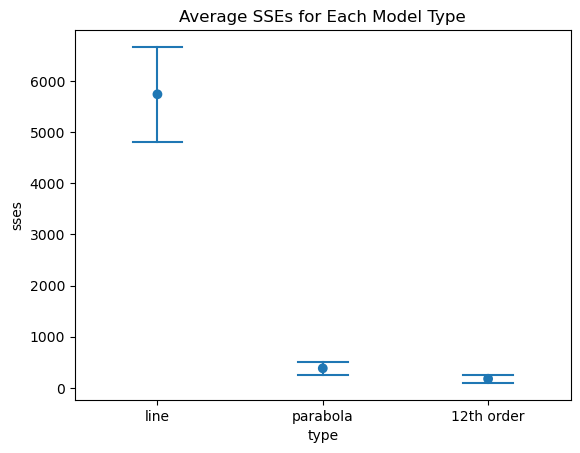

In [104]:
# creating 20 datasets
d = multiple_datasets(n=20)
d # can look at it below

# computing sses for different models
sses_line = model_sses(datasets=d, order=1)
df = pd.DataFrame({'type':'line', 'sses':sses_line})
sses_parabola = model_sses(datasets=d, order=2)
df2 = pd.DataFrame({'type':'parabola', 'sses':sses_parabola})
sses_12thorder = model_sses(datasets=d, order=12)
df3 = pd.DataFrame({'type':'12th order', 'sses':sses_12thorder})
plotting_df = pd.concat([df,df2,df3], ignore_index=True)

# plot
sns.pointplot(data=plotting_df, x='type', y='sses', 
              ci='sd', join=False, scale=.8, errwidth=1.5, capsize=0.3)
plt.title("Average SSEs for Each Model Type")

# df of the mean and sd of sses for each model
mean_sd_line = calc_mean_sd(sses_line, 'line')
mean_sd_parabola = calc_mean_sd(sses_parabola, 'parabola')
mean_sd_12thorder = calc_mean_sd(sses_12thorder, '12th order')
model_mean_sd = pd.concat([mean_sd_line, mean_sd_parabola, mean_sd_12thorder], ignore_index=True)
print('These are the means and standard deviations of the SSEs for each model:')
display(model_mean_sd)

- The 12th order polynomial has the smallest SSEs on average. 
- The first order polynomial has the most variable SSEs because it can't be cusotmized to fit the data very much. It can't be molded to work with the unique error in each dataset since only the slop and intercept can change. therefore, the SSE of the first order polynomial is largely dependent on how the data is spread out. If the data is more spread out, then the SSE is going to be larger. In contrast, the 12th order polynomial is very flexible and can deal with the error that is unique to each dataset. Therefore, the 12th order polynomial's SSEs have a smaller standard deviation.

### Question 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


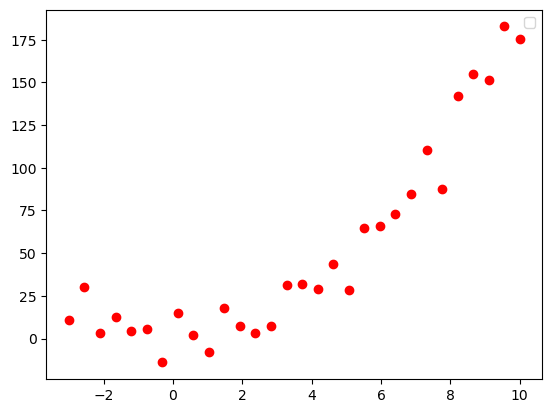

In [105]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(30)
x = np.linspace(-3, 10, num=30)
y = 2*x**2 - x + 1 + np.random.normal(scale=9, size=len(x))

plt.scatter(x,y, color='red')
plt.legend()
plt.show()

#### Q 2.1

Fit the dataset using a:
* second order polynomial (save the coefficients of this model in variable `q_coeffs`)
* third order polynomial (save the coefficients of this model in variable `t_coeffs`)
* Compute the SSE for each model and determine which model is better, motivate your choice with numbers, text and plots.

The quatric's SSEs is: 3428.0929175646256
The cubic's SSEs is: 3426.6762604238806


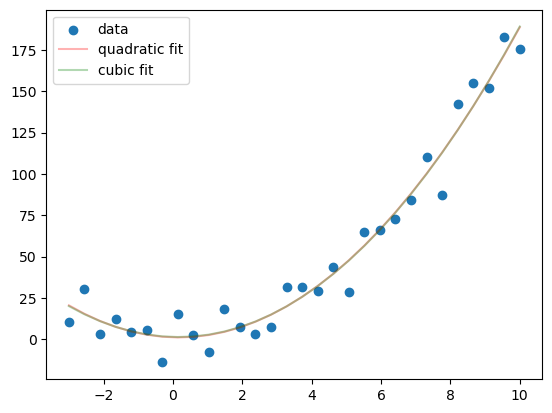

In [108]:
# fit parabola
q_coeffs = np.polyfit(x, y, deg=2)
q_fit = np.polyval(q_coeffs, x)
q_sse = sse(y_hat=q_fit, y=y)

# fit cubic
t_coeffs = np.polyfit(x, y, deg=3)
t_fit = np.polyval(t_coeffs, x)
t_sse = sse(y_hat=t_fit, y=y)

# plot
plt.scatter(x, y, label='data')
plt.plot(x, q_fit, color='red', alpha=0.3, label='quadratic fit')
plt.plot(x, t_fit, color='green', alpha=0.3, label='cubic fit')
plt.legend()

print(f'The quatric\'s SSEs is: {q_sse}')
print(f'The cubic\'s SSEs is: {t_sse}')

The second order polynomial is better than the third order polynomial because both models look exactly the same on the graph above (hence why you can't differentiate the lines). Additionally, the SSEs is almost the exact same between the models. Since I don't reduce the SSEs by much when using a higher order polynomial, nor does it appear to fit the data better, I would pick the second order polynomial for parsimony.

#### Q 2.2

Let's now create a new x for us:

In [111]:
x_new = np.linspace(-10, 10, num=30)

Your task is to use `q_coeffs` and `t_coeffs` in combination to this new `x_new` values to evaluate the model outside of the original range of the data (Hint: You should cosinder using  `polyval` to implement this).

Note that above we are asking you to evaluate the original model fit within a certain range of x-values onto a new range of values. In a certain ways, we are asking you to use the models to make predictions of data outside of the original range of values. You are predicting data really **out there**!

Next, do the following:
* Plot the orginal x and the oriignal y (the orignal data) as black symbols.
* Using different colors, plot on top of the same figure, the models fit over the new range of values (the models used to make the prediction). [Just to make sure, this plot should have data plus two curves]
* Describe what you see:
    * do both model seem reasonably good at making the prediction?
    * which model seems better and why?
    * which model had a better SSE? 
    * is the result with the SSE consistent with what it appears here from the plot?
    * how do you interpret what it is going on here?


In [115]:
# fit the old models to the new data
q_fit2 = np.polyval(q_coeffs, x_new)
q_sse2 = sse(y_hat=q_fit2, y=y)

t_fit2 = np.polyval(t_coeffs, x_new)
t_sse2 = sse(y_hat=t_fit2, y=y)

The quatric's SSE is: 139135.4292223996
The cubic's SSE is: 127530.62503257323


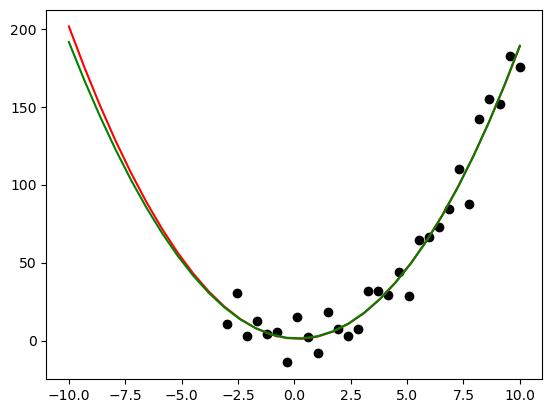

In [122]:
# plot the original x and the original y
plt.scatter(x, y, color='black', label='old data')
plt.plot(x_new, q_fit2, color='red', label='quadratic fit')
plt.plot(x_new, t_fit2, color='green', label='cubic fit')

print(f'The quatric\'s SSE is: {q_sse2}')
print(f'The cubic\'s SSE is: {t_sse2}')

- Both models seem reasonably good at making a prediction over this new range of x's
- The second order polynomial still seems better because it follows the general trend of the data just ike the third order polynomial and its SSEs isn't that much aren't that much bigger. Therefore, I'd pick the second order polynomial for simplicity.
- The third order polynomial had better SSE, but I'm not sure it's small enough to justify using a third order polynomial when a second order polynomial appears to work just fine.
- The SSEs are surprisingly large considering what the plot looks like. The plot looks somewhat similar to the plot before, but now the SSEs are much larger. The SSEs are much larger because the predicted y-values are on a different range than the actual y values. Therefore, the SSE function is no longer finding the difference between y-values with the same x. So the SSEs I have calculated above aren't correct. 